In [1]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt
# import pandas to read dataset 
import pandas as pd
#draw a graph 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
pd.options.mode.chained_assignment = None 

In [2]:
data = pd.read_csv('Datasets2_Cleaned.csv',names=['value'],header=0)
data.head()

,value
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2814 entries, 1749-01-01 to 1983-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   2814 non-null   float64
dtypes: float64(1)
memory usage: 44.0+ KB


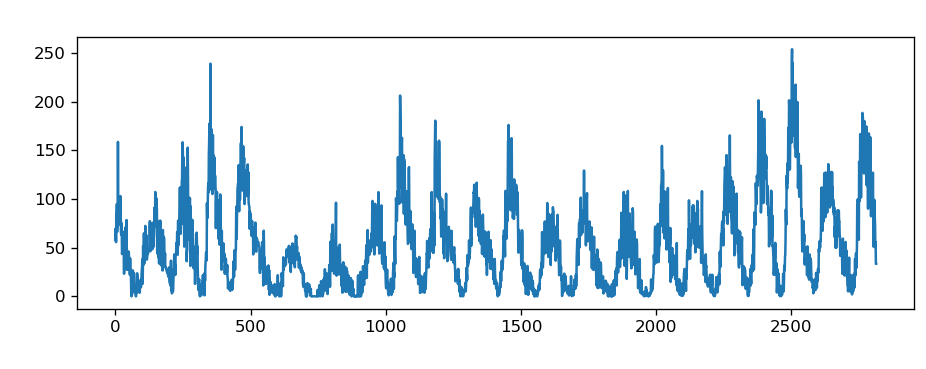

In [4]:
# plotting the points
plt.plot(data.values)
# naming the x axis
plt.xlabel('index of Date in Dataset',color='white')
# naming the y axis
plt.ylabel('Temp',color='white')
# giving a title to my graph
plt.title('Temp Production Jan 1981--Dec 1990',color='white')
# function to show the plot
plt.show()

In [14]:
#split data to 80% train and 20% test  
# train= 2814*80%=2251 column
train = data[:2251]
test = data[2251:]

In [6]:
from pmdarima.arima.utils import ndiffs
#choose the best test model based on min value
## Adf Test
print(ndiffs(data, test='adf'))  
# KPSS test
print(ndiffs(data, test='kpss'))  
# PP test:
print(ndiffs(data, test='pp'))  
#using different test to choose optimal solution 

0
1
0


so we are conclusion the type of test give same value

In [7]:
#The pyramid-arima library for Python allows us to quickly perform this grid search and even creates a model object that you can fit to the training data.
import pmdarima as pm
#create Auo ARIMA Model using pmdarima to get Best model
model = pm.auto_arima(train, start_p=1, start_q=1,  
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      seasonal=False,   # No Seasonality
                      start_P=0, D=0, d=None,   
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
#The AIC (stimator of the relative quality of statistical model) value will allow us to compare how well a model fits the data 
print(model.aic())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=18591.016, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=24672.476, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=18933.586, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=22546.989, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=18560.705, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=18719.357, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=18560.644, Time=0.55 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=18635.914, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=18507.715, Time=1.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=18561.362, Time=0.58 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=18560.898, Time=1.03 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=18560.196, Time=0.67 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=18551.810, Time=2.76 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 7.481 seconds
18507.715

models that have a better fit while using fewer features will receive a better (lower) AIC score than similar models.
The resulting best model parameters gave us an AIC value of 18507.715260386354 in 6.376 seconds

In [8]:
# Create  ARIMA Model
model = ARIMA(train, order=(3,0,2))
#fit model
model_ARIMA = model.fit(disp=0)
print(model_ARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                 2251
Model:                     ARMA(3, 2)   Log Likelihood               -9268.673
Method:                       css-mle   S.D. of innovations             14.853
Date:                Sun, 12 Sep 2021   AIC                          18551.346
Time:                        11:08:56   BIC                          18591.380
Sample:                             0   HQIC                         18565.958
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          45.6055      7.387      6.173      0.000      31.127      60.085
ar.L1.value     0.2320      0.056      4.164      0.000       0.123       0.341
ar.L2.value     0.9262      0.053     17.385    

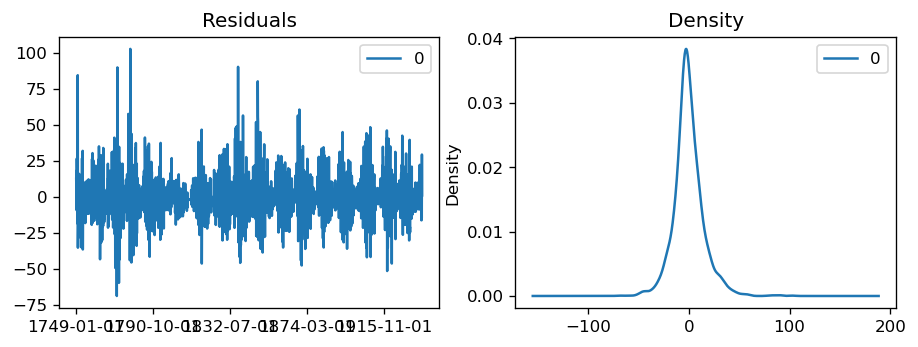

In [9]:

# Plot residual errors
residuals = pd.DataFrame(model_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<Figure size 1800x600 with 0 Axes>

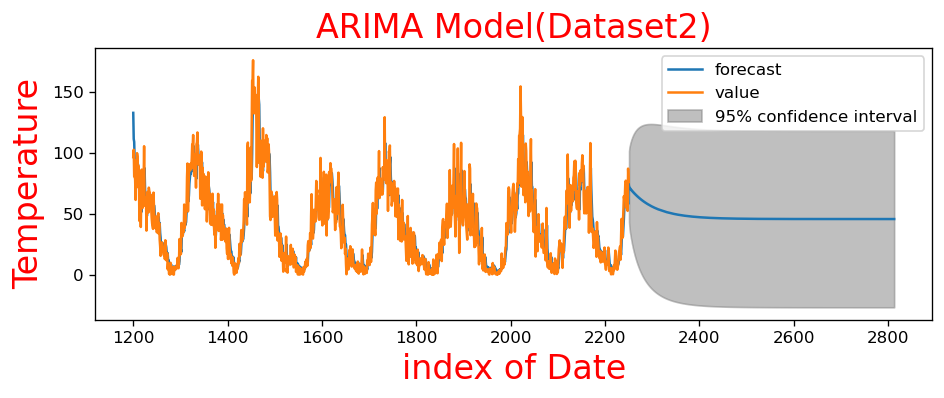

In [10]:
# Actual vs Fitted
plt.figure(figsize=(15,5))
model_ARIMA.plot_predict(start=1200,end=len(data)-1,dynamic=False,alpha=0.05)
plt.xlabel("index of Date" ,fontsize=20,color='red')
plt.ylabel("Temperature",fontsize=20,color='red')
plt.title("ARIMA Model(Dataset2)",fontsize=20,color='red')
plt.show()

In [11]:
predict=model_ARIMA.predict(start=2251,end=len(data)-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [12]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predict))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 62.041
